In [11]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# import gossipcat as gc
# from gossipcat.Feature import Feature
# from gossipcat.Report import Report

In [2]:
%%time

path = '/Users/ewenwang/Documents/practice_data/'
filename = 'loan_default.csv'

dataset = pd.read_csv(path+filename, low_memory=False)

CPU times: user 33 s, sys: 2.38 s, total: 35.4 s
Wall time: 35.7 s


In [3]:
default = dataset['loss']
default[default>0] = 1
dataset['default'] = default

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
target = 'default'
features = [x for x in dataset.columns if x not in [target, 'id', 'loss']]

In [5]:
from sklearn.model_selection import train_test_split

seed = 2018
test_size = 0.2

train, test = train_test_split(dataset, test_size = test_size, random_state = seed)

In [6]:
import Baseline as bs

In [7]:
base = bs.Baseline(dataset, test, target, features, impute=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))



predicting...

done.

Model Report
Accuracy : 0.907235
AUC Score (train): 0.499995
AUC Score (test): 0.500000
             precision    recall  f1-score   support

        0.0       0.91      1.00      0.95     19111
        1.0       0.00      0.00      0.00      1984

avg / total       0.82      0.91      0.86     21095


Model Report
Recall metric in the testing dataset:  0.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


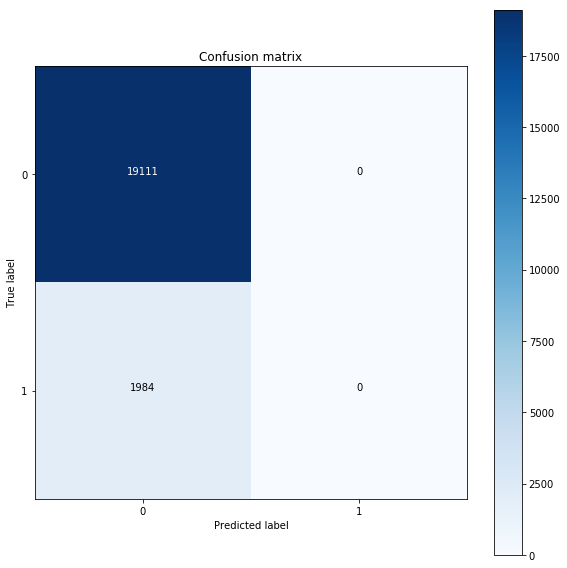

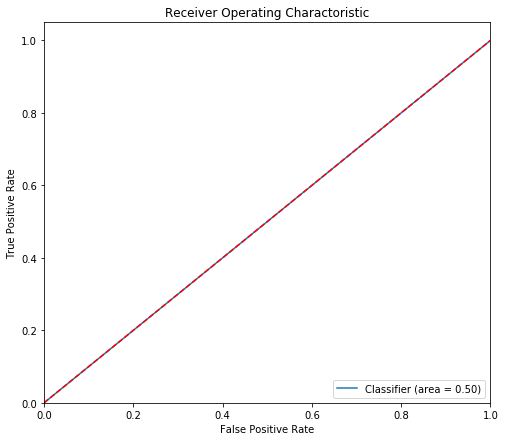


Model Report
Average Precision: 0.0941


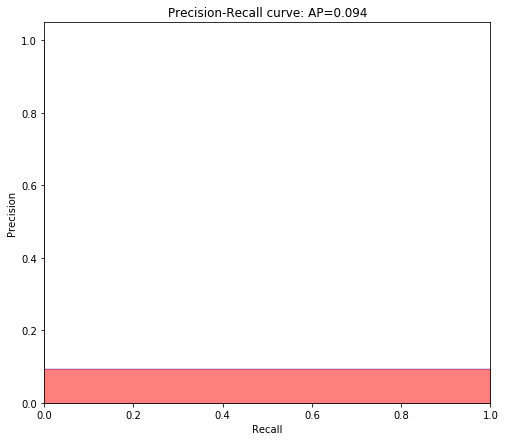

CPU times: user 9.07 s, sys: 2.75 s, total: 11.8 s
Wall time: 12.7 s


In [12]:
%%time

lr = base.LR(report='True')

In [14]:
%%time 

rf = base.RF(report='True')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [5]:
fts = Feature(data=dataset, features=features, target=target)

In [6]:
predictors, new_dataset = fts.aut()

checking...
duplicated features:
 Index(['f34', 'f35', 'f37', 'f38', 'f58', 'f86', 'f87', 'f88', 'f96', 'f97',
       'f98', 'f106', 'f107', 'f108', 'f116', 'f117', 'f118', 'f126', 'f127',
       'f128', 'f155', 'f156', 'f157', 'f165', 'f166', 'f167', 'f175', 'f176',
       'f177', 'f185', 'f186', 'f187', 'f195', 'f196', 'f197', 'f225', 'f226',
       'f227', 'f235', 'f236', 'f237', 'f245', 'f246', 'f247', 'f255', 'f256',
       'f257', 'f265', 'f266', 'f267', 'f294', 'f295', 'f296', 'f302', 'f303',
       'f304', 'f310', 'f311', 'f312', 'f318', 'f319', 'f320', 'f326', 'f327',
       'f328', 'f345', 'f354', 'f362', 'f371', 'f379', 'f408', 'f417', 'f427',
       'f457', 'f478', 'f488', 'f498', 'f508', 'f553', 'f563', 'f573', 'f582',
       'f599', 'f678', 'f700', 'f701', 'f702', 'f729', 'f741', 'f764', 'f770',
       'default'],
      dtype='object')
classifying...
int features count: 97 
float features count: 652 
object features count: 19
generating...
f527-f528  AUC (train):  0.91560

In [8]:
from sklearn.model_selection import train_test_split

seed = 2017
test_size = 0.3

dtrain, dtest = train_test_split(new_dataset, test_size = test_size, random_state = seed)

In [ ]:
clf = gc.simAnneal(dtrain, target, predictors)

simulating...

INFO: Number of possible iterations given cooling schedule: 160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this paramete

2 T: 10.0, score: 0.9975, std: 0.0003, params: {'max_depth': '5.00', 'subsample': '0.70', 'colsample_bytree': '0.10'}


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


In [ ]:
rpt = Report(clf, dtrain, dtest, target, predictors)

In [ ]:
rpt.ALL()

In [6]:
a = 4.444
b = 5.666
print('\na: %s \nb: %s' %('{:.3f}'.format(a), '{:.2f}'.format(b)))


a: 4.444 
b: 5.67


In [10]:
c = '{:.3f}'.format(a)

In [9]:
d = '{:.2f}'.format(b)

In [11]:
type(d)

str

In [6]:
dataset.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [17]:
dataset.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f771,f772,f773,f774,f775,f776,f777,f778,loss,default
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0,0


In [8]:
len(fts.corr_p)

5790

In [10]:
new_data, new_col = fts.generate(corr_list = fts.corr_p)


no pair lists input.


In [29]:
def generate(corr_list, auc_score=0.75, silent=False):
    """ Build new features from correlated features.

    Builds new features based on correlated feature pairs if the new feature
    has an auc greater than auc_score.

    Args:
        corr_list: The correlated list to generate new features from.
        auc_score: The auc to decide whether generate features, default at 0.75.
        silent: Whether print the new features' names out; default with False.

    Returns:
        new_data: A dataset conatianing new features.
        new_data.columns: The column list of the new_data.
    """
    if corr_list is None:
        corr_list = []

    new_data = pd.DataFrame()

    if len(corr_list) > 0:
        print('generating...')
        for index, value in enumerate(corr_list):
            temp = dataset[corr_list[index][0]] - dataset[corr_list[index][1]]
            if len(temp.unique()) > 1:
                temp = pd.DataFrame(temp.fillna(temp.median()))
                lr = LogisticRegression()
                lr.fit(temp, dataset[target])
                prob = lr.predict_proba(temp)[:, 1]
                auc = metrics.roc_auc_score(dataset[target], prob)
                if auc > auc_score:
                    print('-'.join(value), ' AUC (train): ', auc)
                    new_data['-'.join(value)] = dataset[corr_list[index][0]] - dataset[corr_list[index][1]]
        if new_data.shape[1] > 0:
            print('\nnew features:', new_data.columns)
        else:
            print('\nno features meet the requirement.')
    else:
        print('\nno pair lists input.')

    return new_data, new_data.columns.tolist()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
new_data, new_col = generate(corr_list = fts.corr_p)

generating...


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


f527-f528  AUC (train):  0.915607274654
f274-f527  AUC (train):  0.900140457424
f274-f528  AUC (train):  0.937543347206

new features: Index(['f527-f528', 'f274-f527', 'f274-f528'], dtype='object')


In [42]:
corr_pairs = fts.corr_pairs(col_list=fts.int_lst, gamma = 0.999999)

In [44]:
corr_pairs

[('f74', 'f427'),
 ('f303', 'f304'),
 ('f309', 'f311'),
 ('f309', 'f310'),
 ('f597', 'f599'),
 ('f354', 'f371'),
 ('f36', 'f408'),
 ('f354', 'f379'),
 ('f371', 'f427'),
 ('f371', 'f417'),
 ('f371', 'f379'),
 ('f362', 'f741'),
 ('f362', 'f729'),
 ('f326', 'f328'),
 ('f326', 'f327'),
 ('f362', 'f722'),
 ('f309', 'f312'),
 ('f417', 'f427'),
 ('f319', 'f320'),
 ('f325', 'f328'),
 ('f325', 'f327'),
 ('f354', 'f417'),
 ('f325', 'f326'),
 ('f327', 'f328'),
 ('f354', 'f427'),
 ('f417', 'f722'),
 ('f293', 'f294'),
 ('f362', 'f427'),
 ('f362', 'f417'),
 ('f293', 'f295'),
 ('f354', 'f362'),
 ('f371', 'f722'),
 ('f722', 'f729'),
 ('f318', 'f320'),
 ('f310', 'f312'),
 ('f310', 'f311'),
 ('f74', 'f722'),
 ('f345', 'f722'),
 ('f345', 'f729'),
 ('f74', 'f729'),
 ('f74', 'f379'),
 ('f74', 'f371'),
 ('f74', 'f741'),
 ('f74', 'f362'),
 ('f74', 'f354'),
 ('f74', 'f345'),
 ('f318', 'f319'),
 ('f345', 'f427'),
 ('f345', 'f354'),
 ('f379', 'f741'),
 ('f345', 'f417'),
 ('f379', 'f729'),
 ('f379', 'f722'),
 ('